IMPORTING THE NECESSARY LIBRARIES

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
pd.options.mode.chained_assignment = None
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Bidirectional, Dense, Dropout, LSTM

IMPORTING THE REQUIRED .csv FILE AS A DATAFRAME AND CHECKING VALUES IN THE DATAFRAME

In [2]:
df = pd.read_csv('Tata-steel.csv')
df.head(5)

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,03-Jul-15,308.00,308.00,299.75,300.95,302.708180,499554,6430,151219082,118810.0,23.78,8.25,-7.05
1,06-Jul-15,294.90,299.60,292.30,298.75,295.646338,663354,9184,196118181,117663.0,17.74,7.30,3.85
2,07-Jul-15,300.75,303.25,296.00,297.45,299.477691,877207,8581,262703927,211277.0,24.09,7.25,-3.30
3,08-Jul-15,293.80,294.00,282.00,283.40,286.875105,1446189,20272,414875621,563505.0,38.96,12.00,-10.40
4,09-Jul-15,285.20,287.25,279.60,280.55,282.860975,974983,13946,275784642,330248.0,33.87,7.65,-4.65


KNOWING THE SHAPE AND DESCRIBING THE DATAFRAME

In [3]:
shape_df = df.shape
print('Shape of the dataframe:', shape_df)
#Description of data
df.describe()

Shape of the dataframe: (1485, 13)


,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1.485000e+03,1485.000000,1.485000e+03,1.484000e+03,1484.000000,1485.000000,1485.000000
mean,486.573131,494.064949,478.727879,486.225926,486.568546,7.976508e+05,10493.148148,3.715847e+08,1.589507e+05,19.564522,15.337071,-0.347205
std,187.045761,189.642821,184.183050,187.008913,187.008966,4.887324e+05,6684.557776,2.946512e+08,1.511723e+05,9.966975,9.853676,10.852069
min,205.050000,206.250000,200.000000,201.350000,202.938799,5.497700e+04,1000.000000,2.522744e+07,1.960800e+04,2.930000,1.800000,-56.900000
25%,355.650000,360.550000,346.700000,354.250000,354.529229,4.726870e+05,6231.000000,2.148535e+08,7.098925e+04,12.900000,9.100000,-6.300000
50%,470.550000,477.000000,463.350000,469.550000,469.528425,6.804740e+05,8790.000000,2.911989e+08,1.136155e+05,16.935000,12.750000,-0.500000
75%,581.000000,587.500000,572.100000,579.800000,580.223152,9.814850e+05,12930.000000,4.212425e+08,1.883652e+05,22.987500,18.350000,4.950000
max,1231.000000,1246.800000,1200.000000,1233.900000,1215.986040,5.089559e+06,63054.000000,3.514542e+09,1.779684e+06,75.790000,88.450000,53.350000


SUMMARY OF THE DATA IN THE DATAFRAME

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       1485 non-null   object 
 1   Open Price                 1485 non-null   float64
 2   High Price                 1485 non-null   float64
 3   Low Price                  1485 non-null   float64
 4   Close Price                1485 non-null   float64
 5   WAP                        1485 non-null   float64
 6   No.of Shares               1485 non-null   int64  
 7   No. of Trades              1485 non-null   int64  
 8   Total Turnover (Rs.)       1485 non-null   int64  
 9   Deliverable Quantity       1484 non-null   float64
 10  % Deli. Qty to Traded Qty  1484 non-null   float64
 11  Spread High-Low            1485 non-null   float64
 12  Spread Close-Open          1485 non-null   float64
dtypes: float64(9), int64(3), object(1)
memory usage:

CHECK FOR NaN VALUES

In [5]:
df.isnull().sum()

Date                         0
Open Price                   0
High Price                   0
Low Price                    0
Close Price                  0
WAP                          0
No.of Shares                 0
No. of Trades                0
Total Turnover (Rs.)         0
Deliverable Quantity         1
% Deli. Qty to Traded Qty    1
Spread High-Low              0
Spread Close-Open            0
dtype: int64

RECTIFYING THE NaN VALUES IN THE DATAFRAME

In [6]:
df["% Deli. Qty to Traded Qty"][107]=0
df["Deliverable Quantity"][107]=0
#print(list(np.where(df["% Deli. Qty to Traded Qty"].isnull()==True)))
#print(list(np.where(df["Deliverable Quantity"].isnull()==True)))
df.head()

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,03-Jul-15,308.00,308.00,299.75,300.95,302.708180,499554,6430,151219082,118810.0,23.78,8.25,-7.05
1,06-Jul-15,294.90,299.60,292.30,298.75,295.646338,663354,9184,196118181,117663.0,17.74,7.30,3.85
2,07-Jul-15,300.75,303.25,296.00,297.45,299.477691,877207,8581,262703927,211277.0,24.09,7.25,-3.30
3,08-Jul-15,293.80,294.00,282.00,283.40,286.875105,1446189,20272,414875621,563505.0,38.96,12.00,-10.40
4,09-Jul-15,285.20,287.25,279.60,280.55,282.860975,974983,13946,275784642,330248.0,33.87,7.65,-4.65


SETTING DATE AS THE INDEX

In [7]:
df = df[['Date', 'Open Price', 'Close Price']]
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x.split()[0]))
df.set_index('Date', drop=True, inplace=True)
df.head(5)


,Open Price,Close Price
Date,,
2015-07-03,308.00,300.95
2015-07-06,294.90,298.75
2015-07-07,300.75,297.45
2015-07-08,293.80,283.40
2015-07-09,285.20,280.55


GENERATE A PLOT FOR OPEN AND CLOSE PRICE

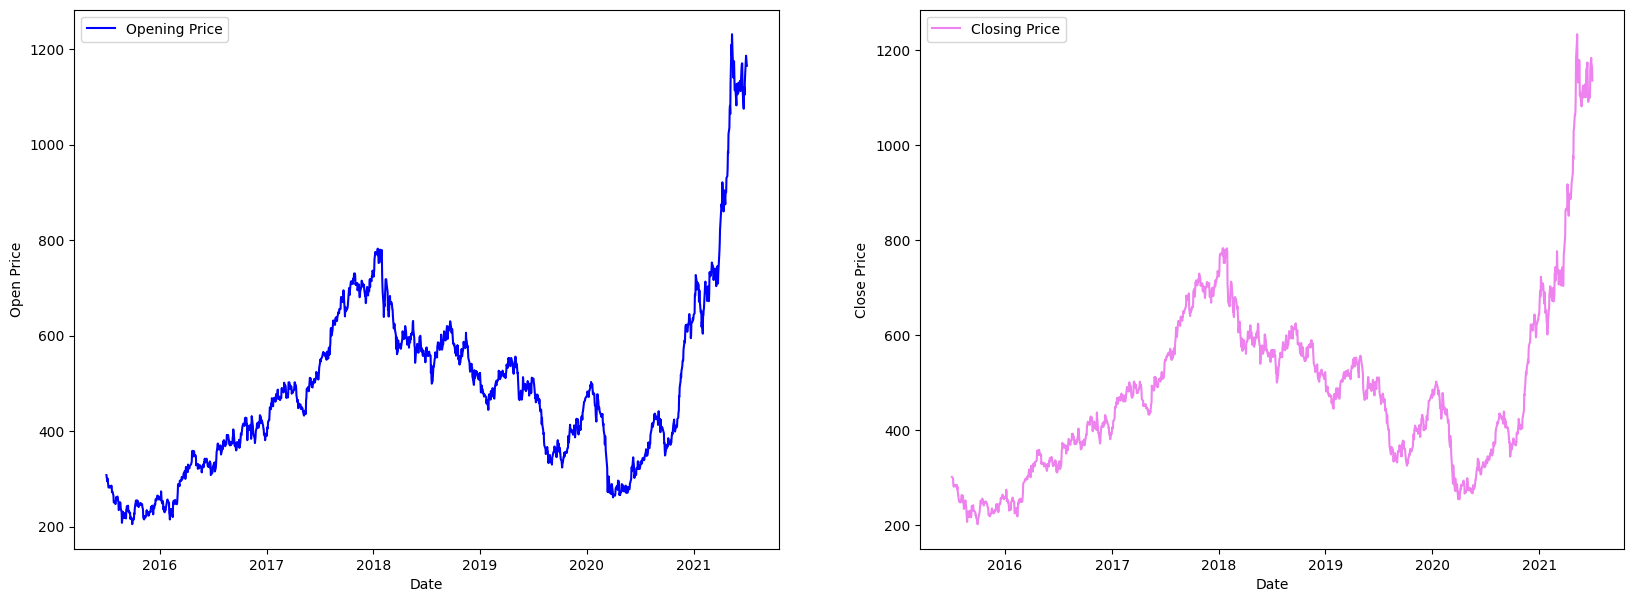

In [8]:
fig, ax=plt.subplots(1,2,figsize=(20,7))
ax[0].plot(df['Open Price'], label='Opening Price', color='blue')
ax[0].set(xlabel='Date', ylabel='Open Price')
ax[0].legend()
ax[1].plot(df['Close Price'], label='Closing Price', color='violet')
ax[1].set(xlabel='Date', ylabel='Close Price')
ax[1].legend()
fig.show()

DATA PRE-PROCESSING

In [9]:
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(5)

,Open Price,Close Price
Date,,
2015-07-03,0.100346,0.096460
2015-07-06,0.087577,0.094330
2015-07-07,0.093279,0.093071
2015-07-08,0.086505,0.079463
2015-07-09,0.078123,0.076703


SPLITTING DATA INTO TRAIN (80%) AND TEST SET (20%)

In [10]:
new_data = round(len(df) * 0.80)
new_data
train_data = df[:new_data]
test_data = df[new_data:]
train_data.shape, test_data.shape


((1188, 2), (297, 2))

FUNCTION TO CREATE A SEQUENCE OF DATA

In [11]:
def create_sequence(dataset):
    sequences = []
    labels = []
    start_index = 0
    for stop_index in range(50, len(dataset)):
        sequences.append(dataset.iloc[start_index:stop_index])
        labels.append(dataset.iloc[stop_index])
        start_index = start_index + 1
    return (np.array(sequences), np.array(labels))    

In [12]:
train_sequence, train_label = create_sequence(train_data)
test_sequence, test_label = create_sequence(test_data)
train_sequence, train_label
#train_sequence.shape, train_label.shape, test_sequence.shape, test_label.shape

(array([[[0.10034602, 0.09646022],
         [0.08757737, 0.09432957],
         [0.0932794 , 0.09307055],
         ...,
         [0.01184268, 0.02658467],
         [0.0303621 , 0.03670524],
         [0.03114187, 0.03772214]],
 
        [[0.08757737, 0.09432957],
         [0.0932794 , 0.09307055],
         [0.08650519, 0.07946346],
         ...,
         [0.0303621 , 0.03670524],
         [0.03114187, 0.03772214],
         [0.03699011, 0.03070069]],
 
        [[0.0932794 , 0.09307055],
         [0.08650519, 0.07946346],
         [0.07812272, 0.07670331],
         ...,
         [0.03114187, 0.03772214],
         [0.03699011, 0.03070069],
         [0.02890004, 0.03869062]],
 
        ...,
 
        [[0.24075247, 0.26531403],
         [0.26536381, 0.26788049],
         [0.26531507, 0.26110116],
         ...,
         [0.08767484, 0.08236889],
         [0.07597836, 0.0626604 ],
         [0.05940835, 0.06508159]],
 
        [[0.26536381, 0.26788049],
         [0.26531507, 0.26110116],
       

LSTM MODEL CREATION

In [13]:
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape = (train_sequence.shape[1], train_sequence.shape[2])))
model.add(Dropout(0.1)) 
model.add(LSTM(units=50))
model.add(Dense(2))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 dropout (Dropout)           (None, 50, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 2)                 102       
                                                                 
Total params: 30902 (120.71 KB)
Trainable params: 30902 (120.71 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


FITTING

In [14]:
model.fit(train_sequence, train_label, epochs=50, validation_data = (test_sequence, test_label), verbose = 1)

Epoch 1/50
36/36 [==============================] - 15s 180ms/step - loss: 0.0072 - mean_absolute_error: 0.0576 - val_loss: 0.0062 - val_mean_absolute_error: 0.0566
Epoch 2/50
36/36 [==============================] - 5s 137ms/step - loss: 6.7413e-04 - mean_absolute_error: 0.0203 - val_loss: 0.0029 - val_mean_absolute_error: 0.0380
Epoch 3/50
36/36 [==============================] - 5s 148ms/step - loss: 5.9512e-04 - mean_absolute_error: 0.0188 - val_loss: 0.0033 - val_mean_absolute_error: 0.0415
Epoch 4/50
36/36 [==============================] - 4s 120ms/step - loss: 5.5361e-04 - mean_absolute_error: 0.0183 - val_loss: 0.0031 - val_mean_absolute_error: 0.0404
Epoch 5/50
36/36 [==============================] - 5s 128ms/step - loss: 5.6898e-04 - mean_absolute_error: 0.0184 - val_loss: 0.0028 - val_mean_absolute_error: 0.0385
Epoch 6/50
36/36 [==============================] - 5s 143ms/step - loss: 5.4307e-04 - mean_absolute_error: 0.0179 - val_loss: 0.0031 - val_mean_absolute_error: 0.

PREDICTION OF DATA FROM TEST SEQUENCE

In [15]:
test_predicted = model.predict(test_sequence)
test_predicted[:5]

8/8 [==============================] - 2s 28ms/step


array([[0.12415883, 0.12875913],
       [0.12634924, 0.13090079],
       [0.12823462, 0.13279633],
       [0.13005032, 0.13461713],
       [0.13069437, 0.13530025]], dtype=float32)

In [16]:
test_inverse_prediction = MMS.inverse_transform(test_predicted)
test_inverse_prediction[:5]

array([[332.43076, 334.30023],
       [334.678  , 336.5116 ],
       [336.61234, 338.46884],
       [338.47513, 340.3489 ],
       [339.1359 , 341.0543 ]], dtype=float32)

GENERATION OF THE DF_MERGE DATAFRAME

In [17]:
df_merge = pd.concat([df.iloc[-247:].copy(), pd.DataFrame(test_inverse_prediction,columns=['Open_Predicted_Price','Close_Predicted_Price'], index=df.iloc[-247:].index)], axis=1)
df_merge[['Open Price','Close Price']] = MMS.inverse_transform(df_merge[['Open Price','Close Price']])
df_merge.head()

,Open Price,Close Price,Open_Predicted_Price,Close_Predicted_Price
Date,,,,
2020-07-09,337.0,344.40,332.430756,334.300232
2020-07-10,343.5,338.60,334.678009,336.511597
2020-07-13,342.3,342.00,336.612335,338.468842
2020-07-14,339.5,336.80,338.475128,340.348907
2020-07-15,339.1,339.15,339.135895,341.054291


PLOT FOR ACTUAL AND PREDICTED OPEN PRICE VERSUS DATE

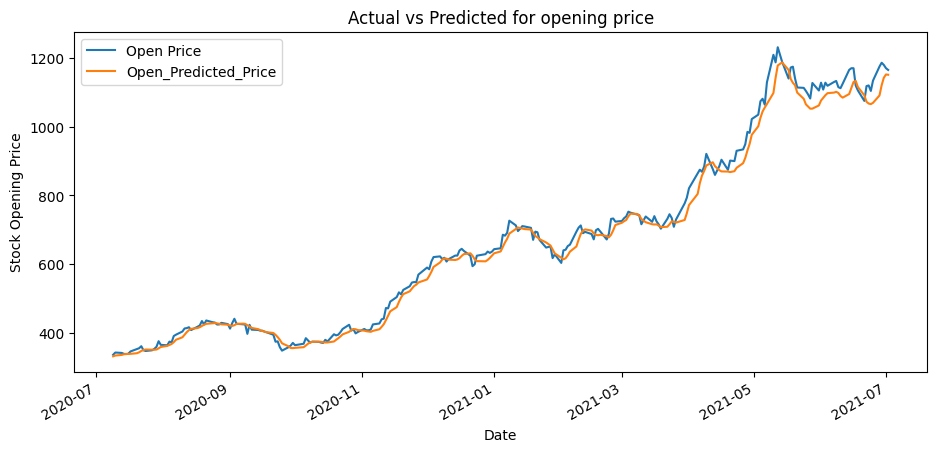

In [18]:
df_merge[['Open Price','Open_Predicted_Price']].plot(figsize=(11,5))
plt.xticks(rotation=30)
plt.xlabel('Date')
plt.ylabel('Stock Opening Price')
plt.title('Actual vs Predicted for opening price')
plt.show()

PLOT FOR ACTUAL AND PREDICTED CLOSE PRICE VERSUS DATE

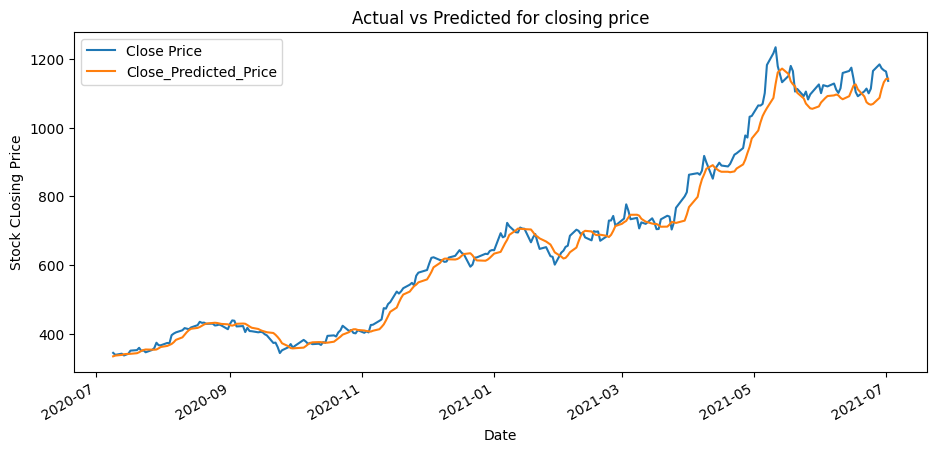

In [19]:
df_merge[['Close Price','Close_Predicted_Price']].plot(figsize=(11,5))
plt.xticks(rotation=30)
plt.xlabel('Date')
plt.ylabel('Stock CLosing Price')
plt.title('Actual vs Predicted for closing price')
plt.show()

In [20]:
df_new_merge = (pd.DataFrame(columns=df_merge.columns, index=pd.date_range(start=df_merge.index[-1], periods=11, freq='D')))
pd.concat([df_merge, df_new_merge])

,Open Price,Close Price,Open_Predicted_Price,Close_Predicted_Price
2020-07-09,337.0,344.40,332.430756,334.300232
2020-07-10,343.5,338.60,334.678009,336.511597
2020-07-13,342.3,342.00,336.612335,338.468842
2020-07-14,339.5,336.80,338.475128,340.348907
2020-07-15,339.1,339.15,339.135895,341.054291
...,...,...,...,...
2021-07-08,NaN,NaN,NaN,NaN
2021-07-09,NaN,NaN,NaN,NaN
2021-07-10,NaN,NaN,NaN,NaN
2021-07-11,NaN,NaN,NaN,NaN


CREATTING A DATAFRAME AND FILLING OPEN PRICE AND CLOSE PRICE COLUMN VALUES

In [21]:
upcoming_prediction = pd.DataFrame(columns=['Open Price','Close Price'],index=df_merge.index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [22]:
current_sequence = test_sequence[-1:]

for i in range(-10,0):
  up_prediction = model.predict(current_sequence)
  upcoming_prediction.iloc[i] = up_prediction
  current_sequence = np.append(current_sequence[0][1:],up_prediction,axis=0)
  current_sequence = current_sequence.reshape(test_sequence[-1:].shape)

1/1 [==============================] - 0s 66ms/step


In [23]:
upcoming_prediction[['Open Price','Close Price']] = MMS.inverse_transform(upcoming_prediction[['Open Price','Close Price']])

UPCOMING OPEN PRICE VERSUS DATE

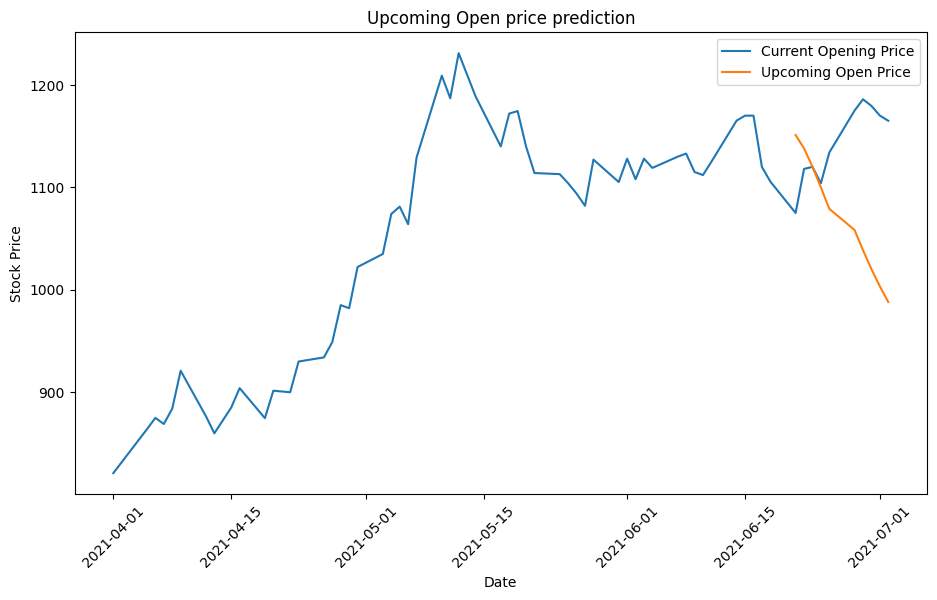

In [33]:
fig,ax=plt.subplots(figsize=(11,6))
ax.plot(df_merge.loc['2021-03-01':,'Open Price'],label='Current Opening Price')
ax.plot(upcoming_prediction.loc['2021-03-01':,'Open Price'],label='Upcoming Open Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title('Upcoming Open price prediction')
ax.legend()
fig.show()

UPCOMING CLOSE PRICE VERSUS DATE

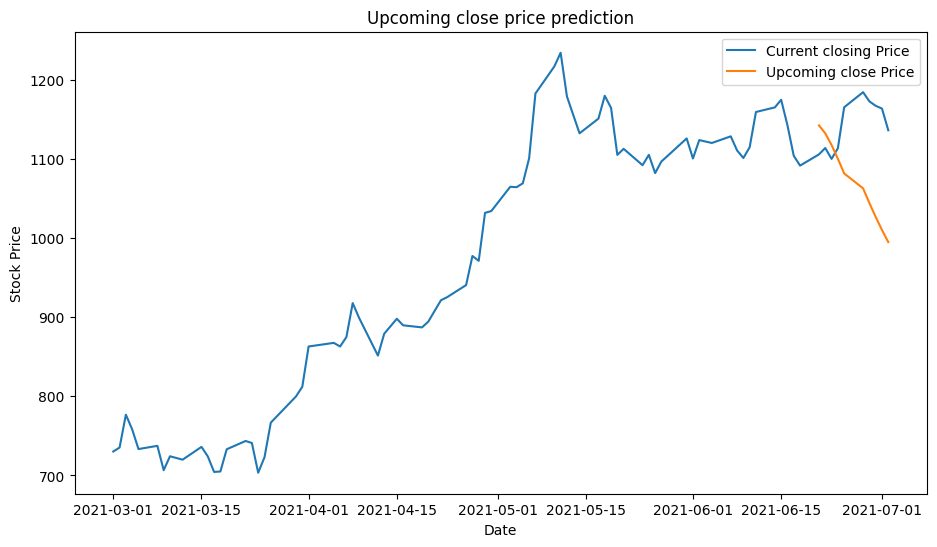

In [35]:
fig,ax=plt.subplots(figsize=(11,6))
ax.plot(df_merge.loc['2021-03-01':,'Close Price'],label='Current closing Price')
ax.plot(upcoming_prediction.loc['2021-03-01':,'Close Price'],label='Upcoming close Price')
#plt.setp(ax.xaxis.get_majorticklabels())
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title('Upcoming close price prediction')
ax.legend()
fig.show()

THANK YOU FOR PROVIDING ME WITH THIS WONDERFUL OPPURTUNITY !!